In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import h5py
import pandas as pd
from scipy import signal

In [2]:
path = 'data/los_20230227.001.h5'

lons = [19, 32]
lats = [59, 71]


In [3]:
def get_all(name):
   print(name)

with h5py.File(path, 'r') as f:
   #f.visit(get_all)

   print(f['Metadata']['Data Parameters'][()]) # type: ignore

[(b'YEAR', b'Year (universal time)', 0, b'y', b'Madrigal Hdf5 Prolog Parameters')
 (b'MONTH', b'Month (universal time)', 0, b'm', b'Madrigal Hdf5 Prolog Parameters')
 (b'DAY', b'Day (universal time)', 0, b'd', b'Madrigal Hdf5 Prolog Parameters')
 (b'HOUR', b'Hour (universal time)', 0, b'h', b'Madrigal Hdf5 Prolog Parameters')
 (b'MIN', b'Minute (universal time)', 0, b'm', b'Madrigal Hdf5 Prolog Parameters')
 (b'SEC', b'Second (universal time)', 0, b's', b'Madrigal Hdf5 Prolog Parameters')
 (b'RECNO', b'Logical Record Number', 0, b'N/A', b'Madrigal Hdf5 Prolog Parameters')
 (b'KINDAT', b'Kind of data', 0, b'N/A', b'Madrigal Hdf5 Prolog Parameters')
 (b'KINST', b'Instrument Code', 0, b'N/A', b'Madrigal Hdf5 Prolog Parameters')
 (b'UT1_UNIX', b'Unix seconds (1/1/1970) at start', 0, b's', b'Madrigal Hdf5 Prolog Parameters')
 (b'UT2_UNIX', b'Unix seconds (1/1/1970) at end', 0, b's', b'Madrigal Hdf5 Prolog Parameters')
 (b'PIERCE_ALT', b'Pierce Point Altitude', 0, b'km', b'Geographic Coordin

In [4]:
with h5py.File(path, 'r') as f:
    # Access the dataset
        
    dset = f['Data']['Table Layout']

    filtered_data = dset[(dset['gdlonr'] >= min(lons)) & (dset['gdlonr'] <= max(lons)) 
                         & (dset['gdlatr'] >= min(lats)) & (dset['gdlatr'] <= max(lats))]

    

In [5]:
df = pd.DataFrame(filtered_data)

df['minute'] = df['min']
df['second'] = df['sec']
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])
df = df[['datetime', 'gps_site', 'sat_id', 'gdlatr', 'gdlonr', 'los_tec', 'tec', 'azm', 'elm', 'gdlat', 'glon', 'gnss_type']]

df['slant_f'] = 1+16*(0.53-df['elm']/180)**3
df['vtec'] = df['los_tec']/df['slant_f']

df['pair_id'] = df['gnss_type'].astype(str) + df['gps_site'].astype(str) + df['sat_id'].astype(str)

df

,datetime,gps_site,sat_id,gdlatr,gdlonr,los_tec,tec,azm,elm,gdlat,glon,gnss_type,slant_f,vtec,pair_id
0,2023-02-27 00:00:00,b'0ams',1,64.532524,19.34989,27.769764,15.152131,164.089737,28.099611,59.526321,22.136164,b'GPS ',1.836287,15.122782,GPS 0ams1
1,2023-02-27 00:00:00,b'0ams',1,64.532524,19.34989,21.971214,16.533957,69.692551,46.114365,65.366020,25.654612,b'GLONASS ',1.328446,16.539038,GLONASS 0ams1
2,2023-02-27 00:00:00,b'0ams',2,64.532524,19.34989,17.914988,17.129431,-124.743805,72.043816,63.964882,17.549551,b'GLONASS ',1.034955,17.309921,GLONASS 0ams2
3,2023-02-27 00:00:00,b'0ams',3,64.532524,19.34989,16.955587,16.518026,151.368866,76.255318,63.885162,20.139503,b'GPS ',1.019251,16.635345,GPS 0ams3
4,2023-02-27 00:00:00,b'0ams',3,64.532524,19.34989,33.387482,14.522314,-116.511421,18.587063,60.488037,5.737080,b'GLONASS ',2.243385,14.882637,GLONASS 0ams3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8279449,2023-02-27 23:59:30,b'ylit',19,66.306602,23.66774,1.588921,1.359379,-74.787498,56.975830,66.731972,18.998480,b'GLONASS ',1.155638,1.374930,GLONASS ylit19
8279450,2023-02-27 23:59:30,b'ylit',20,66.306602,23.66774,36.548283,13.555882,-18.433449,12.163883,75.317780,11.374554,b'GLONASS ',2.582114,14.154401,GLONASS ylit20
8279451,2023-02-27 23:59:30,b'ylit',25,66.306602,23.66774,18.179388,7.898999,18.258711,18.545010,73.196953,31.709162,b'GPS ',2.245428,8.096179,GPS ylit25
8279452,2023-02-27 23:59:30,b'ylit',28,66.306602,23.66774,4.552150,2.980674,62.034519,37.288418,67.821777,32.446449,b'GPS ',1.538382,2.959050,GPS ylit28


In [6]:
def calculate_time_diff(group):
    time_diff = group['datetime'].diff().dt.total_seconds()
    new_group = time_diff.gt(300).cumsum()
    group['curve_id'] = new_group
    return group

# Apply the function to each group defined by the index
df = df.groupby('pair_id').apply(calculate_time_diff)
df.reset_index(inplace=True, drop=True)
df

C:\Users\Maria\AppData\Local\Temp\ipykernel_7496\2362463984.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('pair_id').apply(calculate_time_diff)


,datetime,gps_site,sat_id,gdlatr,gdlonr,los_tec,tec,azm,elm,gdlat,glon,gnss_type,slant_f,vtec,pair_id,curve_id
0,2023-02-27 00:00:00,b'0ams',1,64.532524,19.34989,21.971214,16.533957,69.692551,46.114365,65.366020,25.654612,b'GLONASS ',1.328446,16.539038,GLONASS 0ams1,0
1,2023-02-27 00:00:30,b'0ams',1,64.532524,19.34989,21.791410,16.278343,69.808426,45.588539,65.371887,25.763550,b'GLONASS ',1.339071,16.273532,GLONASS 0ams1,0
2,2023-02-27 00:01:30,b'0ams',1,64.532524,19.34989,21.302105,15.853803,69.865425,45.326176,65.374771,25.818100,b'GLONASS ',1.344457,15.844395,GLONASS 0ams1,0
3,2023-02-27 00:02:00,b'0ams',1,64.532524,19.34989,21.192499,15.713361,69.921814,45.064190,65.377632,25.872700,b'GLONASS ',1.349892,15.699407,GLONASS 0ams1,0
4,2023-02-27 00:02:30,b'0ams',1,64.532524,19.34989,19.916538,14.656281,70.032784,44.541409,65.385399,26.002932,b'GLONASS ',1.360907,14.634752,GLONASS 0ams1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8279449,2023-02-27 23:57:00,b'ylit',9,66.306602,23.66774,13.616341,4.798284,-136.017044,9.900424,57.428440,9.280410,b'GPS ',2.714724,5.015736,GPS ylit9,2
8279450,2023-02-27 23:57:30,b'ylit',9,66.306602,23.66774,13.379707,4.736389,-135.975662,10.110935,57.529984,9.377872,b'GPS ',2.702090,4.951614,GPS ylit9,2
8279451,2023-02-27 23:58:00,b'ylit',9,66.306602,23.66774,9.676122,3.457173,-135.892868,10.532488,57.732277,9.574819,b'GPS ',2.676976,3.614572,GPS ylit9,2
8279452,2023-02-27 23:59:00,b'ylit',9,66.306602,23.66774,9.955832,3.573876,-135.851440,10.743528,57.833023,9.674313,b'GPS ',2.664497,3.736477,GPS ylit9,2


In [7]:
idlist = list(df['pair_id'].unique())

df.loc[(df['pair_id'] == idlist[3])]['curve_id'].unique()

array([0, 1, 2])

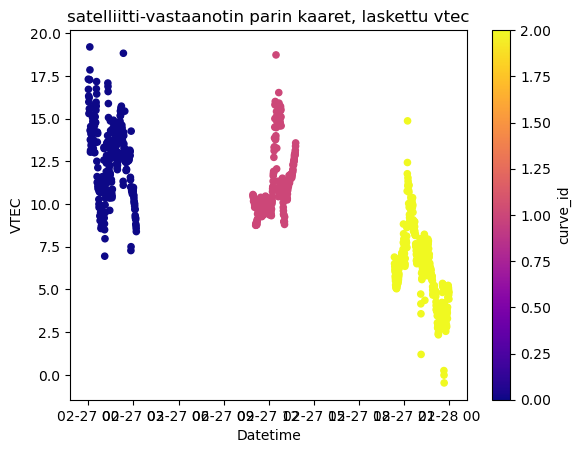

In [8]:
id = 10

df2 = df.loc[df['pair_id'] == idlist[id]]

df2.plot('datetime', 'vtec', 'scatter', c='curve_id', colormap='plasma')
plt.xlabel('Datetime')
plt.ylabel('VTEC')
plt.title('satelliitti-vastaanotin parin kaaret, laskettu vtec')
plt.show()

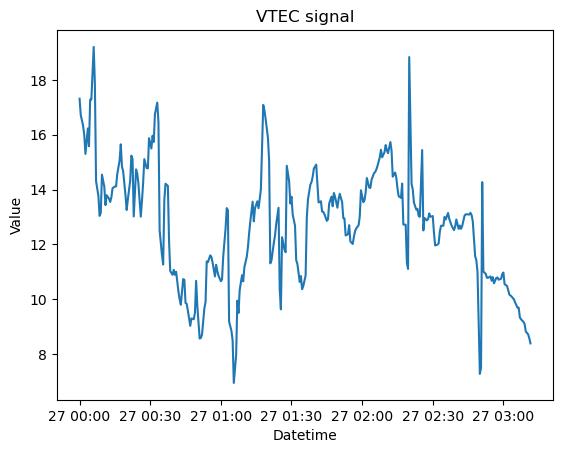

In [9]:
df3 = df2.loc[df2['curve_id'] == 0]

# Plot both lines on the same plot
plt.plot(df3['datetime'], df3['vtec'], label='VTEC')

# Add labels and legend
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('VTEC signal')

# Show the plot
plt.show()


C:\Users\Maria\AppData\Local\Temp\ipykernel_7496\1951046800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['filtered'] = signal.savgol_filter(df3['vtec'], window_length=60,


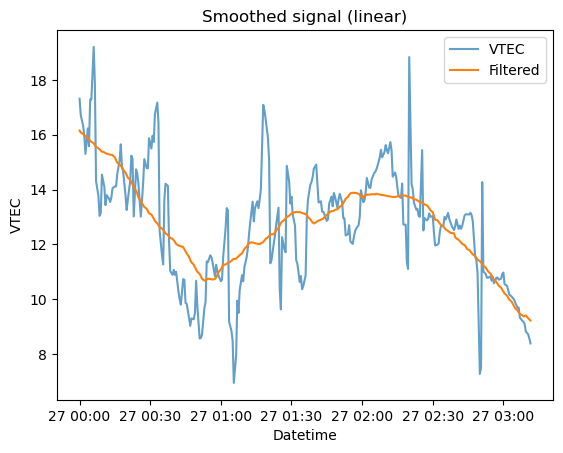

In [10]:
df3['filtered'] = signal.savgol_filter(df3['vtec'], window_length=60, 
                                       polyorder=1, mode="nearest")

# Plot both lines on the same plot
plt.plot(df3['datetime'], df3['vtec'], alpha=0.7, label='VTEC')
plt.plot(df3['datetime'], df3['filtered'], label='Filtered')

# Add labels and legend
plt.xlabel('Datetime')
plt.ylabel('VTEC')
plt.legend()
plt.title('Smoothed signal (linear)')

# Show the plot
plt.show()

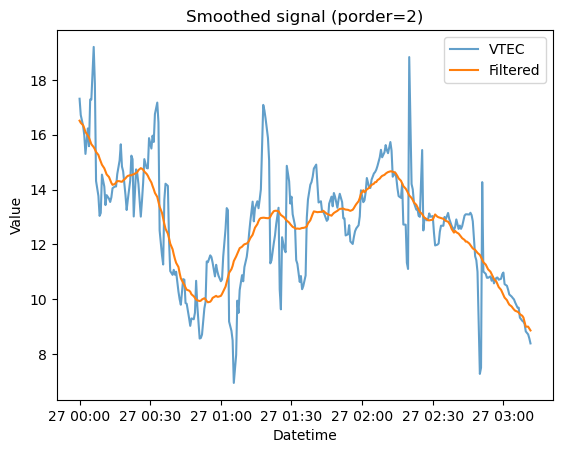

In [11]:
df4 = df3.copy()
df4['filtered'] = signal.savgol_filter(df4['vtec'], window_length=60, 
                                       polyorder=2, mode="nearest")

# Plot both lines on the same plot
plt.plot(df3['datetime'], df4['vtec'], alpha=0.7, label='VTEC')
plt.plot(df3['datetime'], df4['filtered'], label='Filtered')

# Add labels and legend
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.legend()
plt.title('Smoothed signal (porder=2)')

# Show the plot
plt.show()

In [12]:
df3['blrmvd'] = df3['vtec'] - df3['filtered']

C:\Users\Maria\AppData\Local\Temp\ipykernel_7496\3405999280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['blrmvd'] = df3['vtec'] - df3['filtered']


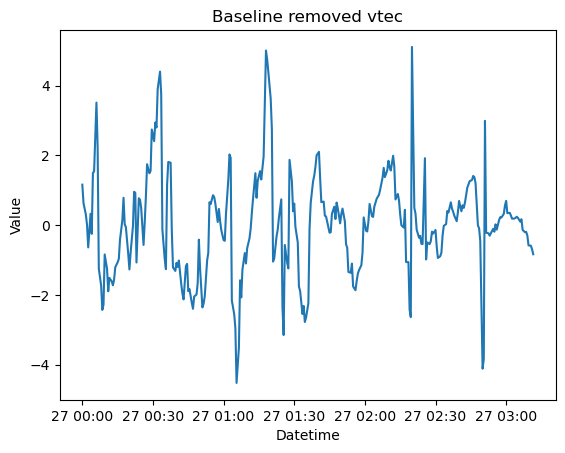

In [13]:
plt.plot(df3['datetime'], df3['blrmvd'])

# Add labels and legend
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Baseline removed vtec')

# Show the plot
plt.show()

In [14]:
df['filtered'] = signal.savgol_filter(df['vtec'], window_length=60, 
                                       polyorder=1, mode="nearest")
df['blrmvd'] = df['vtec'] - df['filtered']

df.to_csv('data/kaari2132023.csv', index=False)


In [15]:
path = 'data/kaari2132023.csv'

df = pd.read_csv(path)
df['datetime'] = pd.to_datetime(df['datetime'])
df

,datetime,gps_site,sat_id,gdlatr,gdlonr,los_tec,tec,azm,elm,gdlat,glon,gnss_type,slant_f,vtec,pair_id,curve_id,filtered,blrmvd
0,2023-02-27 00:00:00,b'0ams',1,64.532524,19.34989,21.971214,16.533957,69.692551,46.114365,65.366020,25.654612,b'GLONASS ',1.328446,16.539038,GLONASS 0ams1,0,15.513717,1.025321
1,2023-02-27 00:00:30,b'0ams',1,64.532524,19.34989,21.791410,16.278343,69.808426,45.588539,65.371887,25.763550,b'GLONASS ',1.339071,16.273532,GLONASS 0ams1,0,15.493551,0.779981
2,2023-02-27 00:01:30,b'0ams',1,64.532524,19.34989,21.302105,15.853803,69.865425,45.326176,65.374771,25.818100,b'GLONASS ',1.344457,15.844395,GLONASS 0ams1,0,15.485430,0.358966
3,2023-02-27 00:02:00,b'0ams',1,64.532524,19.34989,21.192499,15.713361,69.921814,45.064190,65.377632,25.872700,b'GLONASS ',1.349892,15.699407,GLONASS 0ams1,0,15.511053,0.188354
4,2023-02-27 00:02:30,b'0ams',1,64.532524,19.34989,19.916538,14.656281,70.032784,44.541409,65.385399,26.002932,b'GLONASS ',1.360907,14.634752,GLONASS 0ams1,0,15.534301,-0.899550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8279449,2023-02-27 23:57:00,b'ylit',9,66.306602,23.66774,13.616341,4.798284,-136.017044,9.900424,57.428440,9.280410,b'GPS ',2.714724,5.015736,GPS ylit9,2,5.751564,-0.735828
8279450,2023-02-27 23:57:30,b'ylit',9,66.306602,23.66774,13.379707,4.736389,-135.975662,10.110935,57.529984,9.377872,b'GPS ',2.702090,4.951614,GPS ylit9,2,5.679470,-0.727856
8279451,2023-02-27 23:58:00,b'ylit',9,66.306602,23.66774,9.676122,3.457173,-135.892868,10.532488,57.732277,9.574819,b'GPS ',2.676976,3.614572,GPS ylit9,2,5.606460,-1.991889
8279452,2023-02-27 23:59:00,b'ylit',9,66.306602,23.66774,9.955832,3.573876,-135.851440,10.743528,57.833023,9.674313,b'GPS ',2.664497,3.736477,GPS ylit9,2,5.533433,-1.796955


In [16]:
idlist = list(df['pair_id'].unique())

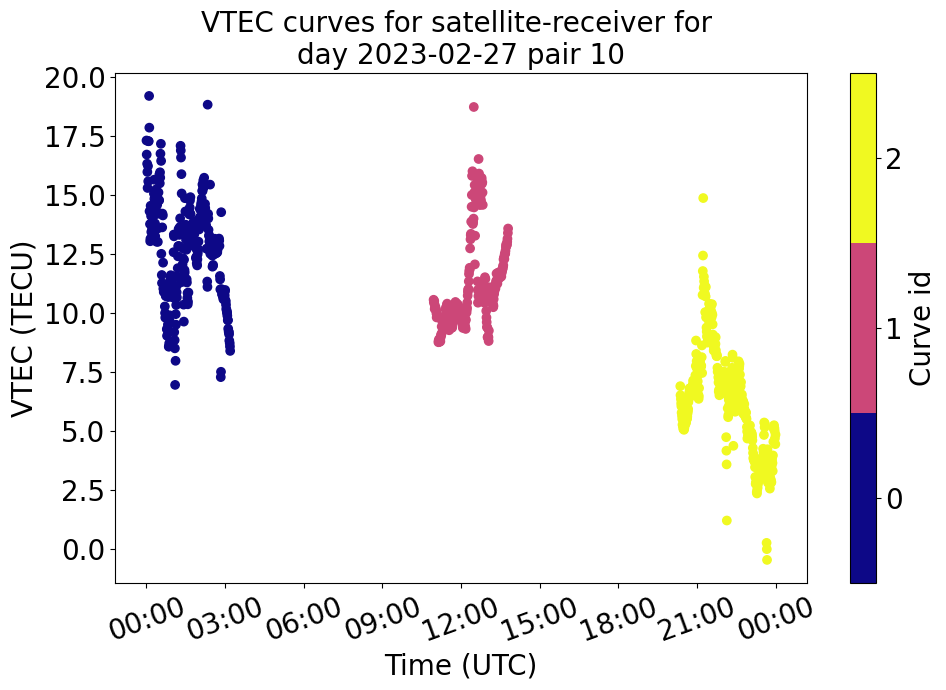

In [17]:
import matplotlib.dates as mdates

id = 10
df2 = df.loc[df['pair_id'] == idlist[id]]
df3 = df2.loc[df2['curve_id'] == 0]
day = df2.iloc[0]['datetime'].date()

# Set larger font size
font_size = 20

# Increase figure size
plt.figure(figsize=(10, 7))

plt.scatter('datetime', 'vtec', data=df2, c='curve_id', cmap='plasma')
cbar = plt.colorbar(values=[0,1,2], ticks=[0, 1, 2])
cbar.set_label('Curve id', fontsize=font_size)
cbar.ax.tick_params(labelsize=font_size)

plt.xlabel('Time (UTC)', fontsize=font_size)
plt.ylabel('VTEC (TECU)', fontsize=font_size)
plt.title(f'VTEC curves for satellite-receiver for \nday {day} pair {id}', fontsize=font_size)
plt.xticks(fontsize=font_size, rotation=20)
plt.yticks(fontsize=font_size)

xformatter = mdates.DateFormatter('%H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)

plt.tight_layout()
plt.show()


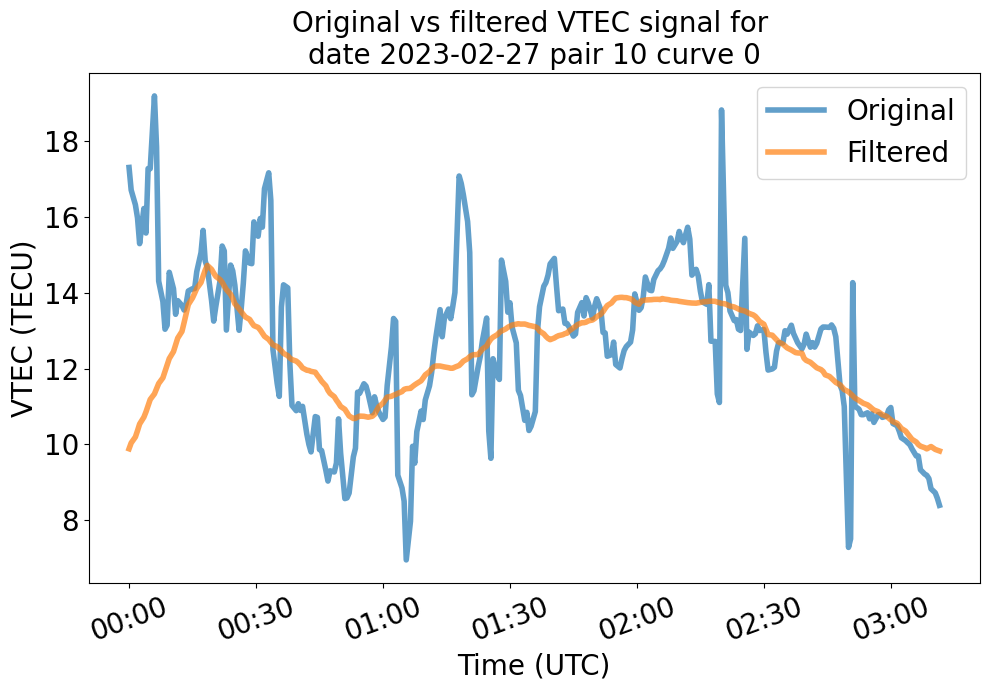

In [18]:

font_size = 20
plt.figure(figsize=(10, 7))

# Plot both lines
plt.plot(df3['datetime'], df3['vtec'], alpha=0.7, label='Original', linewidth=4)
plt.plot(df3['datetime'], df3['filtered'], alpha=0.7, label='Filtered', linewidth=4)

# Add labels, legend, and title
plt.xlabel('Time (UTC)', fontsize=font_size)
plt.ylabel('VTEC (TECU)', fontsize=font_size)
plt.title(f'Original vs filtered VTEC signal for \ndate {day} pair {10} curve {0}', fontsize=font_size)
plt.legend(fontsize=font_size)

# Format x-axis
xformatter = mdates.DateFormatter('%H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
plt.xticks(fontsize=font_size, rotation=20)
plt.yticks(fontsize=font_size)

plt.tight_layout()
plt.show()


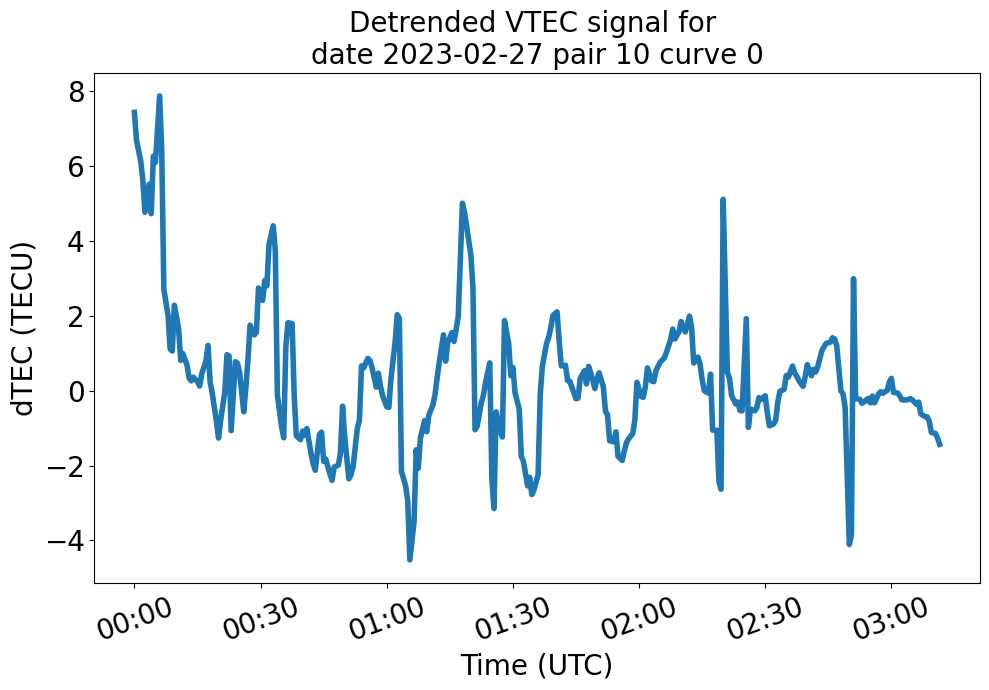

In [19]:

font_size = 20
plt.figure(figsize=(10, 7))

# Plot both lines
plt.plot(df3['datetime'], df3['blrmvd'], linewidth=4)

# Add labels, legend, and title
plt.xlabel('Time (UTC)', fontsize=font_size)
plt.ylabel('dTEC (TECU)', fontsize=font_size)
plt.title(f'Detrended VTEC signal for \ndate {day} pair {10} curve {0}', fontsize=font_size)

# Format x-axis
xformatter = mdates.DateFormatter('%H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
plt.xticks(fontsize=font_size, rotation=20)
plt.yticks(fontsize=font_size)

plt.tight_layout()
plt.show()

In [20]:
df3

,datetime,gps_site,sat_id,gdlatr,gdlonr,los_tec,tec,azm,elm,gdlat,glon,gnss_type,slant_f,vtec,pair_id,curve_id,filtered,blrmvd
8298,2023-02-27 00:00:00,b'0ams',2,64.532524,19.34989,17.914988,17.129431,-124.743805,72.043816,63.964882,17.549551,b'GLONASS ',1.034955,17.309921,GLONASS 0ams2,0,9.882268,7.427654
8299,2023-02-27 00:00:30,b'0ams',2,64.532524,19.34989,17.256950,16.546890,-124.668312,72.611893,63.985680,17.609171,b'GLONASS ',1.032466,16.714305,GLONASS 0ams2,0,10.035931,6.678374
8300,2023-02-27 00:01:30,b'0ams',2,64.532524,19.34989,16.835194,16.164743,-124.628693,72.896294,63.994930,17.635536,b'GLONASS ',1.031265,16.324792,GLONASS 0ams2,0,10.193890,6.130902
8301,2023-02-27 00:02:00,b'0ams',2,64.532524,19.34989,16.457888,15.823888,-124.587738,73.180916,64.004196,17.661978,b'GLONASS ',1.030094,15.977073,GLONASS 0ams2,0,10.359528,5.617544
8302,2023-02-27 00:02:30,b'0ams',2,64.532524,19.34989,15.723524,15.157804,-124.501556,73.750778,64.024872,17.721577,b'GLONASS ',1.027837,15.297676,GLONASS 0ams2,0,10.537063,4.760613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,2023-02-27 03:09:00,b'0ams',2,64.532524,19.34989,25.455332,8.719341,107.430878,8.524446,59.002522,41.655224,b'GLONASS ',2.798851,9.094922,GLONASS 0ams2,0,9.910126,-0.815204
8593,2023-02-27 03:09:30,b'0ams',2,64.532524,19.34989,24.949951,8.472897,107.660217,8.078978,58.778168,42.070087,b'GLONASS ',2.826665,8.826639,GLONASS 0ams2,0,9.942103,-1.115464
8594,2023-02-27 03:10:30,b'0ams',2,64.532524,19.34989,24.768900,8.375970,107.776863,7.854715,58.687332,42.217777,b'GLONASS ',2.840775,8.719064,GLONASS 0ams2,0,9.865192,-1.146129
8595,2023-02-27 03:11:00,b'0ams',2,64.532524,19.34989,24.481302,8.244561,107.893166,7.630829,58.565018,42.439507,b'GLONASS ',2.854934,8.575085,GLONASS 0ams2,0,9.844843,-1.269758
